In [175]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
#test-train split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [176]:
df = pd.read_csv("weather.csv")
df

,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.0,3.4,6.3,30,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,3.6,4.4,9.7,39,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,3.6,5.8,3.3,85,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,39.8,7.2,9.1,54,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,2.8,5.6,10.6,50,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
5,0.0,5.8,8.2,44,70,57,1023.8,1021.7,7,5,10.9,14.8,No,0.2,No
6,0.2,4.2,8.4,43,63,47,1024.6,1022.2,4,6,12.4,17.3,No,0.0,No
7,0.0,5.6,4.6,41,65,57,1026.2,1024.2,6,7,12.1,15.5,No,0.0,No
8,0.0,4.0,4.1,48,70,48,1026.1,1022.7,7,7,14.1,18.9,No,16.2,Yes
9,16.2,5.4,7.7,31,82,32,1024.1,1020.7,7,1,13.3,21.7,Yes,0.0,No


In [177]:
df.shape

(361, 15)

In [178]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

In [179]:
# encode variable 'RainToday', 'RainTomorrow'
df['RainToday']= le.fit_transform(df['RainToday'])
df['RainTomorrow'] =le.fit_transform(df['RainTomorrow'])

graph for Rainfall: total =46


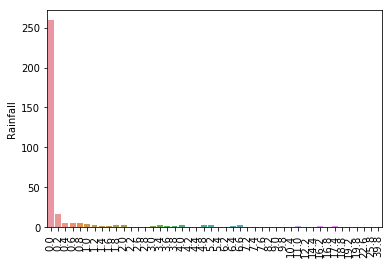

graph for Evaporation: total =55


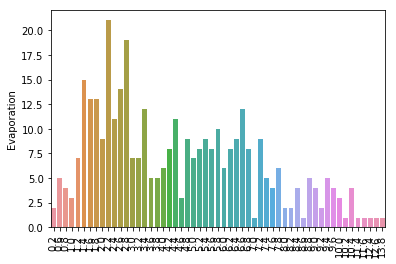

graph for Sunshine: total =114


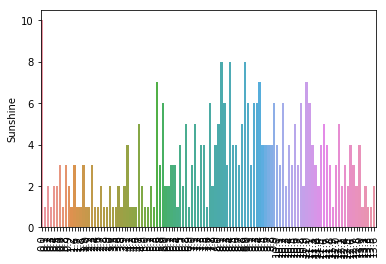

graph for WindGustSpeed: total =35


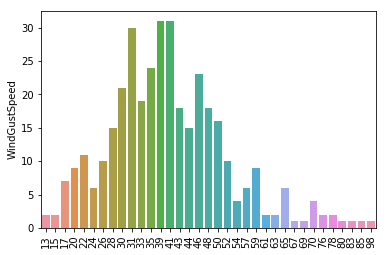

graph for Humidity9am: total =60


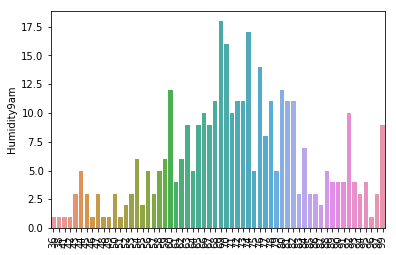

graph for Humidity3pm: total =74


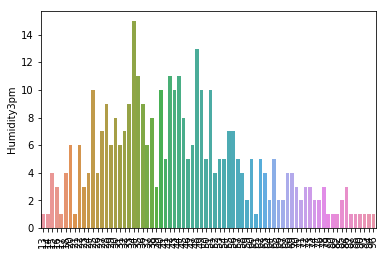

graph for Pressure9am: total =187


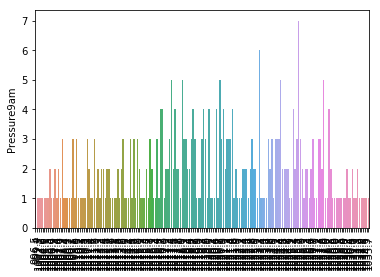

graph for Pressure3pm: total =191


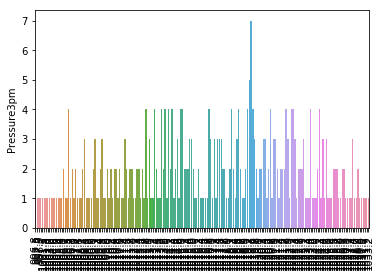

graph for Cloud9am: total =9


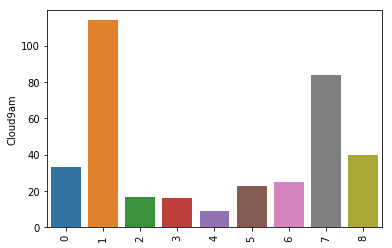

graph for Cloud3pm: total =9


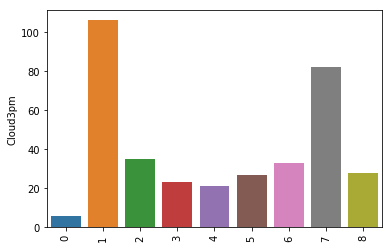

graph for Temp9am: total =178


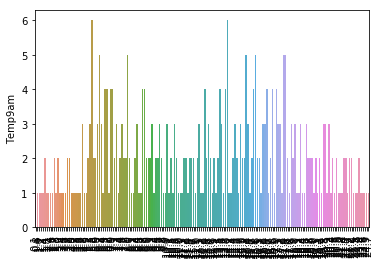

graph for Temp3pm: total =199


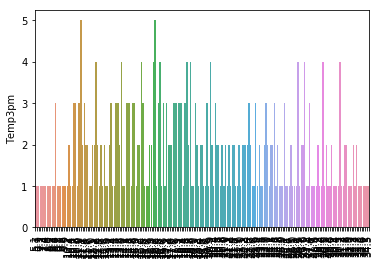

graph for RainToday: total =2


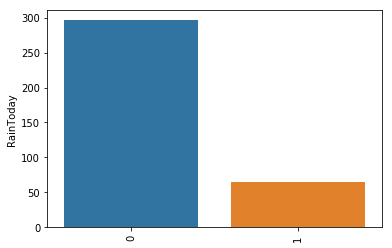

graph for RISK_MM: total =46


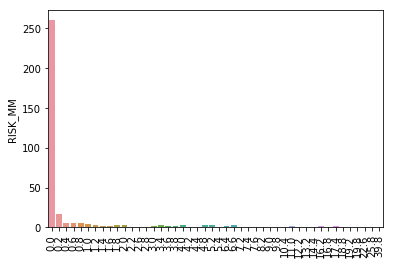

graph for RainTomorrow: total =2


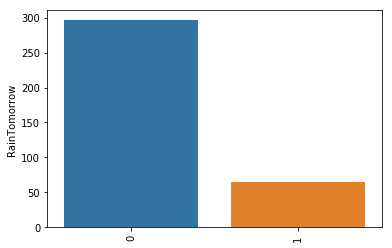

In [180]:
for i in df.columns:
    num=df[i].value_counts()
    print("graph for %s: total =%d" %(i,len(num)))
    chart = sns.barplot(x=num.index, y=num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [181]:
from sklearn.preprocessing import StandardScaler
scaled_features = df.copy()
col_names = ['Rainfall','Evaporation','Pressure9am','Pressure3pm']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
print(scaled_features)

     Rainfall  Evaporation  Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  \
0   -0.336022    -0.428840       6.3             30           68           29   
1    0.520914    -0.053994       9.7             39           80           36   
2    0.520914     0.470789       3.3             85           82           69   
3    9.137884     0.995573       9.1             54           62           56   
4    0.330484     0.395820      10.6             50           68           49   
5   -0.336022     0.470789       8.2             44           70           57   
6   -0.288415    -0.128963       8.4             43           63           47   
7   -0.336022     0.395820       4.6             41           65           57   
8   -0.336022    -0.203932       4.1             48           70           48   
9    3.520191     0.320851       7.7             31           82           32   
10  -0.336022    -0.128963      11.9             30           74           34   
11  -0.288415     0.995573  

In [182]:
X= scaled_features.iloc[:,0:12]
print(X)
y= scaled_features['RainTomorrow']

     Rainfall  Evaporation  Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  \
0   -0.336022    -0.428840       6.3             30           68           29   
1    0.520914    -0.053994       9.7             39           80           36   
2    0.520914     0.470789       3.3             85           82           69   
3    9.137884     0.995573       9.1             54           62           56   
4    0.330484     0.395820      10.6             50           68           49   
5   -0.336022     0.470789       8.2             44           70           57   
6   -0.288415    -0.128963       8.4             43           63           47   
7   -0.336022     0.395820       4.6             41           65           57   
8   -0.336022    -0.203932       4.1             48           70           48   
9    3.520191     0.320851       7.7             31           82           32   
10  -0.336022    -0.128963      11.9             30           74           34   
11  -0.288415     0.995573  

In [183]:
model = GaussianNB()

In [184]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)
#print(X_train)
#Create a Gaussian Classifier
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)


[0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print(scores)

[0.80821918 0.875      0.88888889 0.875      0.86111111]


In [174]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.863013698630137
